# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"insurance.csv")
# Print shape of dataset
print(df.shape)

(1338, 7)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [3]:
features_with_na

[]

* **There are no null values in the dataset**

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [4]:
df.duplicated().sum()

1

* **No Duplicates in the dataset**

**Remove `sex` from the dataset as it is correlated with `smoker` and relatively less correlated to the target compared to `smoker` feature**

In [5]:
df.drop('sex', inplace=True, axis=1)

# Feature Engineering

### Type of Features

**Numeric Features**

In [6]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 4


**Categorical Features**

In [7]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 2


**Discrete features**

In [8]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


**Continues Features**

In [16]:
continuous_features=[feature for feature in num_features if feature not in discrete_features and feature != 'expenses']
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 2


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**


In [10]:
X = df.drop('expenses', axis=1)
y = df['expenses']

In [11]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

**Manual encoding target column**

## Feature Transformation

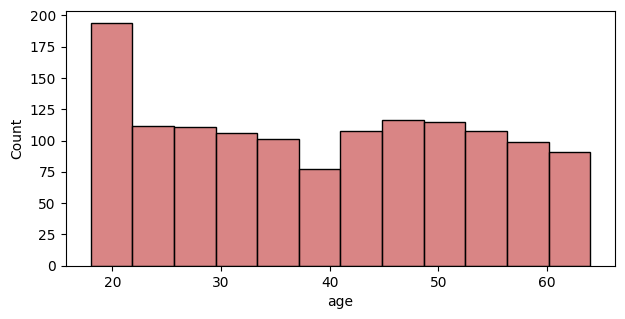

In [12]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* Age column has Kurtosis
* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [18]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

age    0.055673
bmi    0.284593
dtype: float64

· -If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· -If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· -If the skewness is less than -1 or greater than 1, the data are highly skewed

## Apply Power Transformer to Check if it can reduces the outliers

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['age']
X_copy = pt.fit_transform(X[transform_features])

In [20]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

In [28]:
X_copy['age']

0      -1.524529
1      -1.616539
2      -0.762870
3      -0.379118
4      -0.454058
          ...   
1333    0.789055
1334   -1.616539
1335   -1.616539
1336   -1.345582
1337    1.465743
Name: age, Length: 1338, dtype: float64

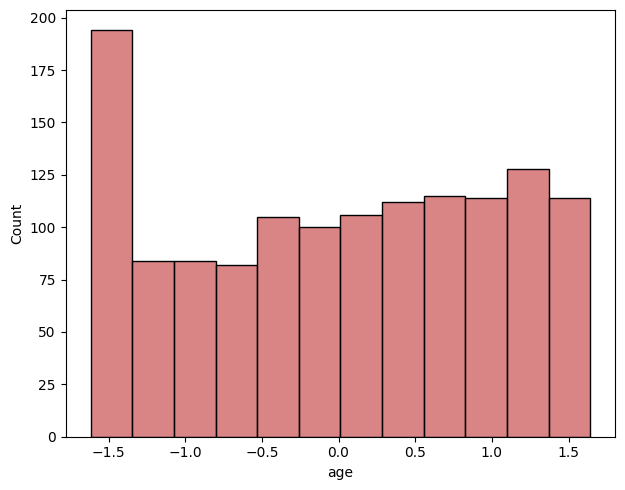

In [21]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

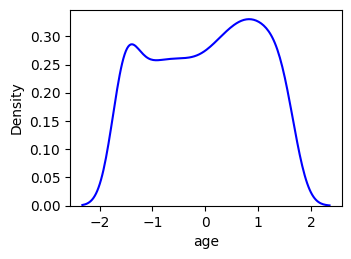

In [26]:
plt.subplot(2, 2, i+1)
sns.kdeplot(x=X_copy['age'], color='blue')
plt.xlabel('age')
plt.tight_layout()

**Looks like the box-cox transformation doesn't show much improvement. Lets try log transformation**

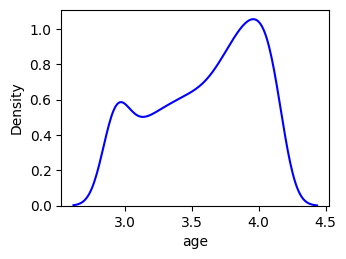

In [38]:
plt.subplot(2, 2, i+1)
sns.kdeplot(x=np.log(df['age']), color='blue')
plt.xlabel('age')
plt.tight_layout()

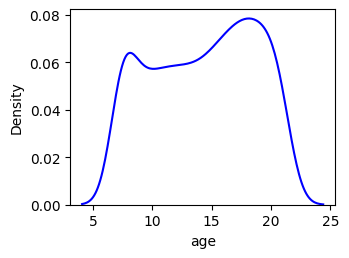

In [66]:
from scipy import stats
transformed_feature = stats.boxcox(np.log(df['age']))
plt.subplot(2, 2, i+1)
sns.kdeplot(x=np.array(transformed_feature[0]), color='blue')
plt.xlabel('age')
plt.tight_layout()

**Doing any of the transformations (boxcox, log) doesn't reduce the Kurtosis **

**Checking Skewness**

In [22]:
X_copy.skew(axis=0, skipna=True)

age   -0.100193
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [23]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

smoker : 2
region : 4


## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [67]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [68]:
num_features

['age', 'bmi', 'children']

In [71]:
X.head()

,age,bmi,children,smoker,region
0,19,27.9,0,yes,southwest
1,18,33.8,1,no,southeast
2,28,33.0,3,no,southeast
3,33,22.7,0,no,northwest
4,32,28.9,0,no,northwest


### **Preprocessing using Column Transformer**

In [70]:
# Create Column Transformer with 3 types of transformers
or_columns = ['smoker', 'children']
oh_columns = ['region']
transform_columns= [] # Nothing to transform

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [72]:
X = preprocessor.fit_transform(X)

In [73]:
X

array([[ 0.        ,  0.        ,  0.        , ..., -1.43876426,
        -0.4536457 , -0.90861367],
       [ 0.        ,  0.        ,  1.        , ..., -1.50996545,
         0.51418574, -0.07876719],
       [ 0.        ,  0.        ,  1.        , ..., -0.79795355,
         0.38295436,  1.58092576],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.50996545,
         1.02270734, -0.90861367],
       [ 0.        ,  0.        ,  0.        , ..., -1.29636188,
        -0.79812808, -0.90861367],
       [ 0.        ,  1.        ,  0.        , ...,  1.55168573,
        -0.25679863, -0.90861367]])

# Regression

In [33]:
# from imblearn.combine import SMOTETomek, SMOTEENN

# # Resampling the minority class. The strategy can be changed as required.
# smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# # Fit the model to generate the data.
# X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [74]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 9), (268, 9))

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [79]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted) # Calculate Accuracy
    rmse = np.sqrt(mse) # Calculate F1-score
    r2 = r2_score(true, predicted) # Calculate Precision

    return mse, rmse , r2

In [81]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ada Boost": AdaBoostRegressor(),
     "XGB Regressor": XGBRegressor()
}

In [83]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    r2_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train ,y_train_pred)

        # Test set performance
        model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test ,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- MSE: {:.4f}".format(model_train_mse))
        print('- RMSE: {:.4f}'.format(model_train_rmse)) 
        print('- R2: {:.4f}'.format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- MSE: {:.4f}".format(model_test_mse))
        print('- RMSE: {:.4f}'.format(model_test_rmse)) 
        print('- R2: {:.4f}'.format(model_test_r2))
        
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)
        
    return report

## Model Training 

In [84]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Linear Regression
Model performance for Training set
- MSE: 37310253.5463
- RMSE: 6108.2120
- R2: 0.7415
----------------------------------
Model performance for Test set
- MSE: 33534768.4157
- RMSE: 5790.9212
- R2: 0.7840


Decision Tree
Model performance for Training set
- MSE: 244463.1644
- RMSE: 494.4322
- R2: 0.9983
----------------------------------
Model performance for Test set
- MSE: 33417084.7543
- RMSE: 5780.7512
- R2: 0.7848


Random Forest
Model performance for Training set
- MSE: 3530722.4944
- RMSE: 1879.0217
- R2: 0.9755
----------------------------------
Model performance for Test set
- MSE: 21221622.7552
- RMSE: 4606.6933
- R2: 0.8633


Ada Boost
Model performance for Training set
- MSE: 26904026.9157
- RMSE: 5186.9092
- R2: 0.8136
----------------------------------
Model performance for Test set
- MSE: 28333529.1381
- RMSE: 5322.9249
- R2: 0.8175


XGB Regressor
Model performance for Training set
- MSE: 1000380.9061
- RMSE: 1000.1904
- R2: 0.9931
--------------------

**Results of All Models**

In [85]:
base_model_report

,Model Name,R2 Score
2,Random Forest,0.863306
4,XGB Regressor,0.826414
3,Ada Boost,0.817496
1,Decision Tree,0.784751
0,Linear Regression,0.783993


**Here we can use Random Forest for Hyper Parameter Tuning**

**Define hyper parameters for models with more than 80% accuracy**

In [90]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

adaboost_params = {
    "n_estimators": [10, 50, 100, 200],
    "learning_rate":[0.01, 0.1, 1.0]
}

In [91]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBRegressor(), xgboost_params),
    ("RF", RandomForestRegressor(), rf_params),
    ("ADABoost", AdaBoostRegressor(), adaboost_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [92]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 5, 'max_depth': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}
---------------- Best Params for ADABoost -------------------
{'n_estimators': 10, 'learning_rate': 0.01}


In [93]:
model_param

{'XGBoost': {'min_child_weight': 5, 'max_depth': 3},
 'RF': {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10},
 'ADABoost': {'n_estimators': 10, 'learning_rate': 0.01}}

## Retraining the Model with best Parameters

In [94]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF']),
    "AdaBoostRegressor": AdaBoostRegressor(**model_param['ADABoost']),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X, y=y, models=best_models)

Random Forest Regressor
Model performance for Training set
- MSE: 6498074.2542
- RMSE: 2549.1321
- R2: 0.9550
----------------------------------
Model performance for Test set
- MSE: 20037661.6228
- RMSE: 4476.3447
- R2: 0.8709


AdaBoostRegressor
Model performance for Training set
- MSE: 20603208.6868
- RMSE: 4539.0758
- R2: 0.8573
----------------------------------
Model performance for Test set
- MSE: 22330859.7517
- RMSE: 4725.5539
- R2: 0.8562


XGBRegressor
Model performance for Training set
- MSE: 12424459.1930
- RMSE: 3524.8346
- R2: 0.9139
----------------------------------
Model performance for Test set
- MSE: 21129523.3078
- RMSE: 4596.6861
- R2: 0.8639




In [95]:
tuned_report

,Model Name,R2 Score
0,Random Forest Regressor,0.870932
2,XGBRegressor,0.863899
1,AdaBoostRegressor,0.856161


In [96]:
best_model = RandomForestRegressor(**model_param['RF'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
r2_score = r2_score(y_test,y_pred)


print("FINAL MODEL 'Random Forest'")
print ("R2 Score value: {:.4f}".format(r2_score))

FINAL MODEL 'Random Forest'
R2 Score value: 0.8702


## Best Model is Random Forest Regressor with Accuracy 87.02%

In [99]:
df

,age,bmi,children,smoker,region,expenses
0,19,27.9,0,yes,southwest,16884.92
1,18,33.8,1,no,southeast,1725.55
2,28,33.0,3,no,southeast,4449.46
3,33,22.7,0,no,northwest,21984.47
4,32,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...
1333,50,31.0,3,no,northwest,10600.55
1334,18,31.9,0,no,northeast,2205.98
1335,18,36.9,0,no,southeast,1629.83
1336,21,25.8,0,no,southwest,2007.95
